<a href="https://colab.research.google.com/github/marcelogbrito/machine-learning-negocios/blob/main/DeteccaoFraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import special

import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
fraudes = pd.read_csv('https://github.com/marcelogbrito/machine-learning-negocios/blob/main/Fraud_Data.csv?raw=true', header=0)

In [3]:
ips = pd.read_csv("https://github.com/marcelogbrito/machine-learning-negocios/blob/main/IpAddress_to_Country.csv?raw=true",header=0)

In [4]:
fraudes.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [5]:
for col in fraudes.columns:
    print("# de valores nulos em {}: {}".format(col, fraudes[col].isnull().sum()))

# de valores nulos em id: 0
# de valores nulos em cadastro: 0
# de valores nulos em compra: 0
# de valores nulos em valor: 0
# de valores nulos em id_dispositivo: 0
# de valores nulos em fonte: 0
# de valores nulos em browser: 0
# de valores nulos em genero: 0
# de valores nulos em idade: 0
# de valores nulos em ip: 0
# de valores nulos em fraude: 0


In [6]:
fraudes.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
for col in ips.columns:
    print("{}: {}".format(col, ips[col].dtype))

limite_inferior_ip: float64
limite_superior_ip: int64
pais: object


In [8]:
# checar se os numeros de ip sao inteiros ou nao com lambdas
ip_floats = ips.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()
print("Número de limites inferiores de endereço IP com decimal não-zero: {}".format(ip_floats))

Número de limites inferiores de endereço IP com decimal não-zero: 0


In [9]:
ips.limite_inferior_ip = ips.limite_inferior_ip.astype(int)

In [10]:
for col in ips.columns:
    print("# de valores nulos em {}: {}".format(col, ips[col].isnull().sum()))

# de valores nulos em limite_inferior_ip: 0
# de valores nulos em limite_superior_ip: 0
# de valores nulos em pais: 0


In [11]:
#checar se há outliers
display(ips[ips.limite_inferior_ip == ips.limite_inferior_ip.max()])
display(ips[ips.limite_superior_ip == ips.limite_superior_ip.max()])

,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


In [12]:
ips.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [13]:
fraudes.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [14]:
def isp_counts(isp):
    pais = ips[(ips.limite_inferior_ip <= isp) & (ips.limite_superior_ip >= isp)]
    if pais.shape[0] == 1:
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ips.limite_superior_ip.max():
            return print("Muito grande")
        elif isp < ips.limite_inferior_ip.min():
            return print("Muito pequeno")
        else:
            return print("Faltando")
        
ip_counts = fraudes.ip.apply(isp_counts)
ip_counts.value_counts()

A saída de streaming foi truncada nas últimas 5000 linhas.
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Series([], Name: ip, dtype: int64)

In [15]:
def ip_para_pais(ip):
    tmp = ips[(ips.limite_inferior_ip <= ip) & (ips.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0]
    elif tmp.shape[0] < 1:
        return print("Faltando")
    elif tmp.shape[0] > 1:
        return print("Erro")

fraudes["pais"] = fraudes.ip.apply(ip_para_pais)

A saída de streaming foi truncada nas últimas 5000 linhas.
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Falta

In [16]:
fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## Analise exploratoria

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Genero x fraude

Text(0, 0.5, 'Casos')

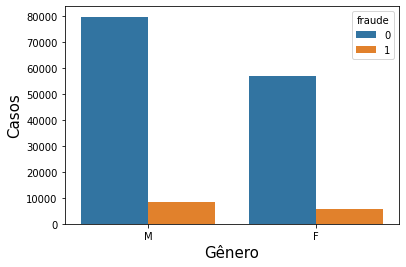

In [18]:
sns.countplot(x="genero", hue="fraude", data=fraudes)
plt.xlabel("Gênero", fontsize=15)
plt.ylabel("Casos", fontsize=15)

usando histograma countplot do seaborn usado apara contagem de observações em cada categoria (dados categoricos) https://seaborn.pydata.org/generated/seaborn.countplot.html

Hue indica de acordo com a variavel o que é fraude e o que não é

homens compõe a maioria da base de clientes do E-commerce. Portanto, estes estarão envolvidos em mais casos de fraude do que em relação às mulheres que compõe a minoria dos clientes.

### Fraude x valor

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

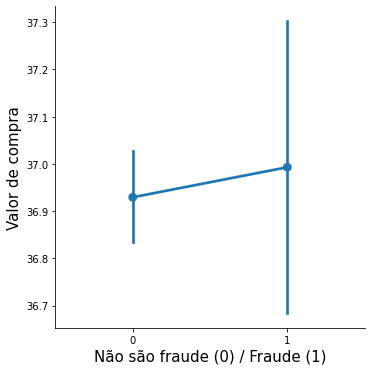

In [19]:
sns.factorplot(x="fraude", y="valor", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

gráfico factorplot do seaborn permite fazer uma analise estatistica em conjunto

Text(3.674999999999997, 0.5, 'Valor de compra')

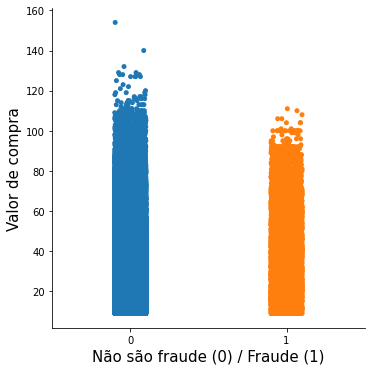

In [20]:
sns.catplot(x="fraude", y="valor", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

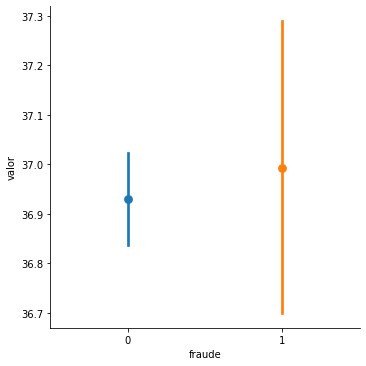

In [21]:
sns.catplot(x="fraude", y="valor", hue="fraude", kind="point", data=fraudes)

Observando a visualização, perceberemos que conseguimos produzir um gráfico que nos mostrará a média de valor de compra em cada um dos casos de fraude e não fraude. Embora haja um aumento muito pequeno no valor médio de compra associado à atividade fraudulenta apontados pelos pontos, as barras de erro são razoavelmente grandes para detectar uma tendência real. Aparentemente, ainda não temos informações consistentes.



### Fraude x idade

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Idade')

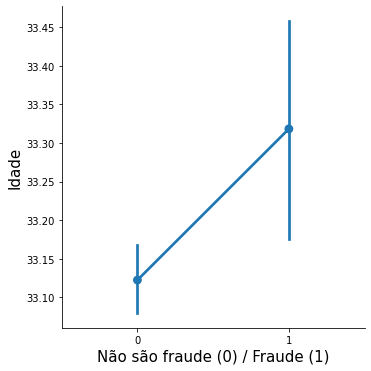

In [22]:
sns.factorplot(x="fraude", y="idade", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Idade", fontsize=15)

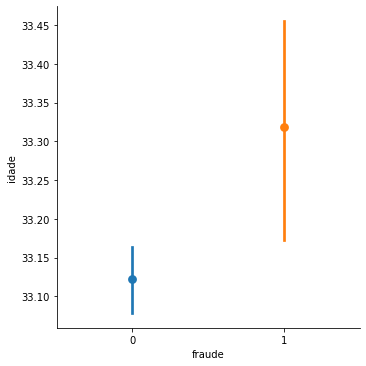

In [23]:
sns.catplot(x="fraude", y="idade", hue="fraude", kind="point", data=fraudes)

No gráfico fornecido, parece que pode haver uma tendência útil, mas novamente o aumento é bastante sutil; apesar de os casos de fraude terem uma média de idade um pouco maior dos que os casos de não fraude, a informação estará dentro das barras de erro inclusive. Portanto, não poderemos tirar nenhuma conclusão efetiva.

### Fraude x fonte de marketing

Text(0, 0.5, 'Contagem')

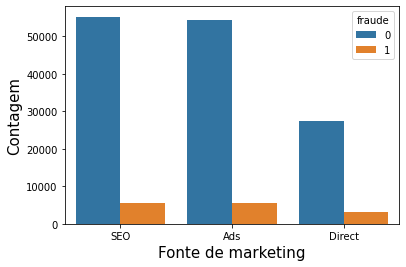

In [24]:
sns.countplot(x="fonte", hue="fraude", data=fraudes)
plt.xlabel("Fonte de marketing", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Perceberemos que, de forma geral, não parece existir uma fonte específica mais associada às fraudes. Porém, há menos fontes diretas associadas a fraude, pois são a minoria no geral.

Portanto, a diminuição provavelmente tem a ver com a campanha não ser tão bem sucedida quanto a otimização dos mecanismos de pesquisa e anúncio para atrair clientes ao site, o que fornece o dado à equipe de marketing da empresa de que realmente os usuários tendem a chegar na companhia mais por conta dos algoritmos do que anúncios, o que pode gerar mais campanhas fora da internet para aumentar a parte de "Direct".

## Explorando os países

In [25]:
#soma casos de fraude e gera um dataframe
sums_f = fraudes[fraudes["fraude"] == 1]["fraude"].groupby(fraudes.pais).sum()
sums_f = sums_f.to_frame().reset_index()

# soma casos de nao fraude e gera um dataframe
sums_nf = fraudes[fraudes["fraude"] == 0]["fraude"].groupby(fraudes.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

Text(0, 0.5, 'Países')

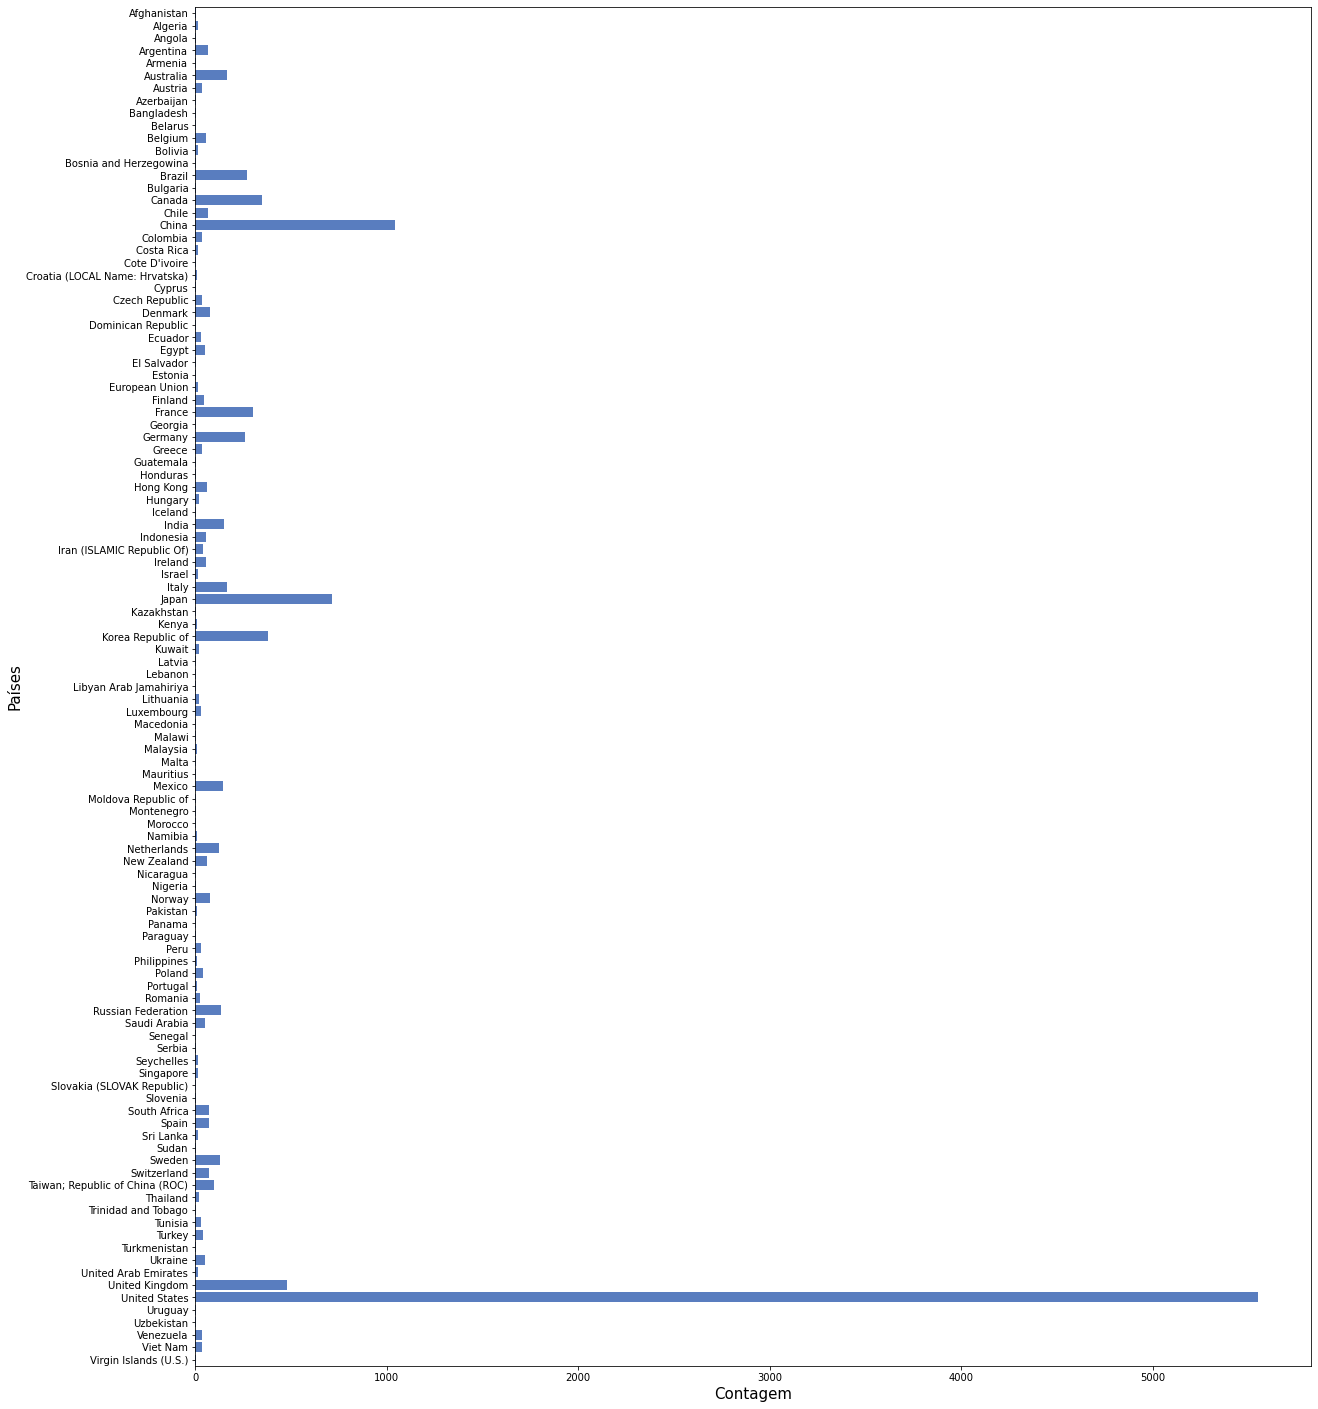

In [26]:
#duas novas variáveis f e ax para podermos usar uma função dentro do gráfico sem precisarmos escrever tudo novamente, 
#caso quisermos. Serão iguais a subplots() que receberão a definição do tamanho da imagem como tendo quase as mesmas 
#dimensões da célula, ou seja, figsize igual a (20,25)
f, ax = plt.subplots(figsize=(20,25))
#cores através de sns.set_color_code() recebendo "muted" https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f,
            label="Total", color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)

Aparentemente, alguns lugares como Estados Unidos e Reino Unido possuem mais casos fraudulentos, mas não poderemos identificar esse fato como uma possível variável-foco, pois não sabemos efetivamente qual é o percentual de ocorrências.

## Explorando os IDs e IPs

In [27]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraudes["fraude"]

userid_count = fraudes.groupby(["id_dispositivo"]).id.count()
tmp_df["id_por_dispositivo"] = fraudes.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraudes.groupby(["ip"]).id.count()
tmp_df["id_por_ip"] = fraudes.ip.apply(lambda x: userid_count2[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


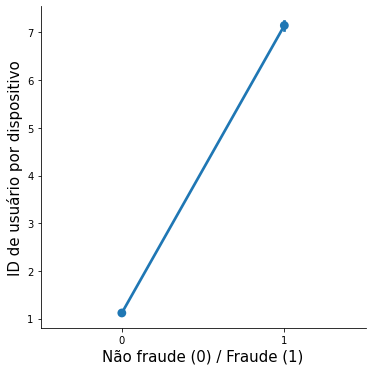

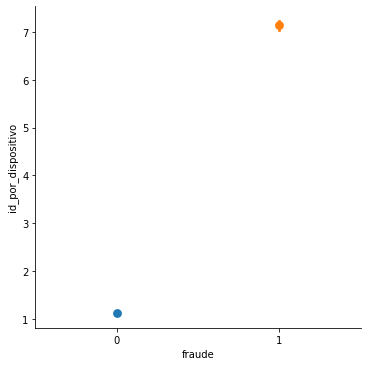

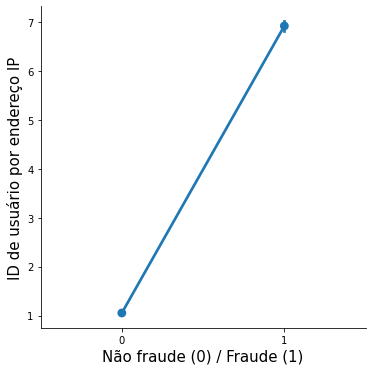

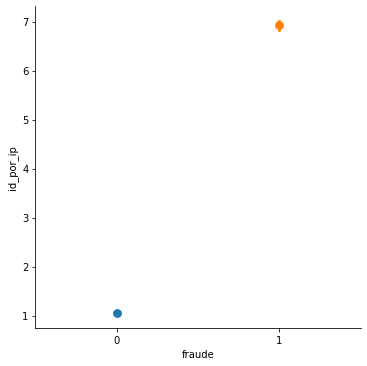

In [28]:
sns.factorplot(x="fraude", y="id_por_dispositivo", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por dispositivo", fontsize=15)

sns.catplot(x="fraude", y="id_por_dispositivo", hue="fraude", kind="point", data=tmp_df)

sns.factorplot(x="fraude", y="id_por_ip", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por endereço IP", fontsize=15)
sns.catplot(x="fraude", y="id_por_ip", hue="fraude", kind="point", data=tmp_df)


Como retorno da execução do código, receberemos dois gráficos e perceberemos correlações bastante claras e importantes entre ambos; vários IDs de usuários associados a um ID de dispositivo único ou a um endereço IP nos fornecem um grande indicador de comportamentos fraudulentos.

Essa observação faz sentido, pois se tivermos uma só pessoa realizando compras no E-commerce, teremos apenas um ID e um dispositivo, ou um ID e um endereço de IP, ou seja, caso haja um ID de usuário associado a vários dispositivos ou endereços de IP, é possível entender que há diversas pessoas ou robôs manipulando a conta.

Analisando os gráficos, veremos uma média de 7 IDs por dispositivo ou endereço de IP. Pode ser que haja um mesmo computador com um IP próprio conectado em uma mesma rede que está utilizando várias contas, o que indica fraudes também.

## Explorando o periodo de compra

In [29]:
#usando datetime para descobrir tempo decorrido entre o cadastro e a compra
tmp_df["cadastro"] = fraudes.cadastro.apply(pd.to_datetime)
tmp_df["compra"] = fraudes.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'Tempo entre início e compra (segundos)')

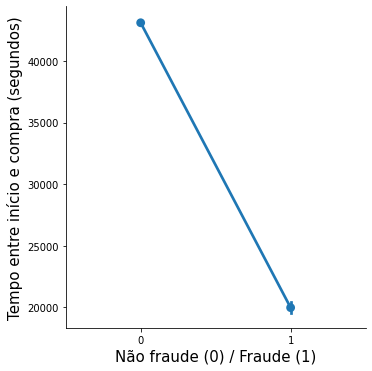

In [30]:
sns.factorplot(x="fraude", y="tempo", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize=15)

quando se trata de uma não fraude, o tempo entre o cadastro e a compra é maior, pois é necessário entrar em um website e preencher com os dados pessoais e de pagamento na página, o que acarreta certa demora.

Nos casos de fraude, o tempo corresponde a menos da metade do tempo necessário para as situações regulares. Então, também são correlações claramente importantes, pois prova que essa diferença está fortemente relacionada com atividades fraudulentas também.

Portanto, teremos muitas informações para fazermos outras análises que abarcam o dia da semana, hora do dia, semana do ano e etc.

In [31]:
#uma olhadinha no banco de dados
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Observando os números, veremos o caso de 12 IDs que realizou o cadastro e a compra em apenas 1 segundo, o que é humanamente impossível e confirma a fraude.

Text(0, 0.5, 'Contagem')

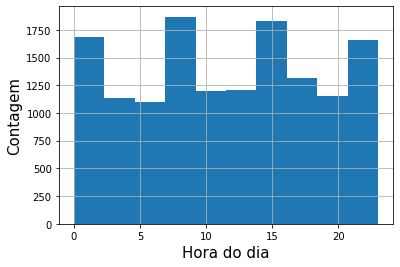

In [32]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel("Hora do dia", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

horas do dia em que as situações de fraude mais significativas começam a acontecer. Aparentemente, há uma correlação que não faz muito sentido em relação aos momentos do dia.

Text(0, 0.5, 'Contagem')

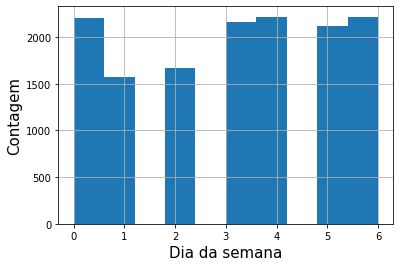

In [33]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

parece que a fraude acontece com bastante regularidade tanto ao longo das horas do dia quanto dos dias da semana.

Text(0, 0.5, 'Contagem')

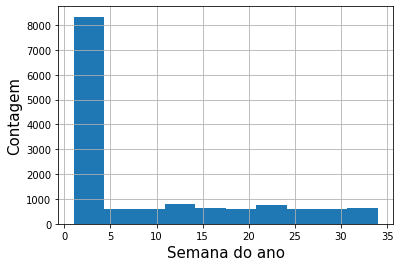

In [34]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel("Semana do ano", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

há um enorme número de ocorrências de fraude nas primeiras semanas do ano que correspondem aos períodos de Natal e Ano Novo. Porém, não teremos certeza de que isso será um recurso útil em nosso conjunto de dados, afinal é uma época quando muitos clientes regulares costumam fazer compras no E-commerce.

Portanto, é mais apropriado simplesmente recomendar que a equipe de segurança da empresa esteja sempre em alerta máximo durante as primeiras três semanas do ano.

# Engenharia de Features

In [35]:
# cria nova coluna id_por_dispoitivo
userid_count3 = fraudes.groupby("id_dispositivo").id.count()
fraudes["id_por_dispositivo"] = fraudes.id_dispositivo.apply(lambda x: userid_count3[x])

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


In [36]:
userid_count4 = fraudes.groupby("ip").id.count()
fraudes["id_por_ip"] = fraudes.ip.apply(lambda x: userid_count4[x])

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1


In [37]:
# media id_por)dispositivo id_por_ip
fraudes["media_id"] = (fraudes.id_por_dispositivo + fraudes.id_por_ip) * 0.5

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0


In [38]:
fraudes.cadastro = fraudes.cadastro.apply(pd.to_datetime)
fraudes.compra = fraudes.compra.apply(pd.to_datetime)
fraudes["tempo"] = (fraudes.compra - fraudes.cadastro).apply(lambda x: x.seconds)

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1,1.0,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461


In [39]:
#transformando categorias em colunas numericas dummies 
pais_dummies = pd.get_dummies(fraudes.pais, prefix='pais')
fraudes = pd.concat([fraudes, pais_dummies], axis=1)

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,...,pais_Saint Kitts and Nevis,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1,1.0,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
# dando drop em algumas variaveis que pelas analises anteriores ja verificamos nao serem importantes
fraudes.drop(["id",
            "cadastro",
            "compra",
            "id_dispositivo",
            "ip",
            "id_por_dispositivo",
            "id_por_ip",
            "pais",
            "fonte",
            "browser",
            "genero",
            "idade",
            "valor"], axis=1, inplace = True)

## Transformando variaveis em gaussianas

Text(0, 0.5, 'Contagem normalizada')

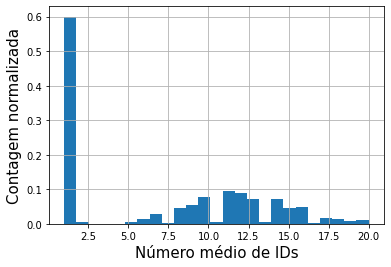

In [41]:
fraudes[fraudes["fraude"] == 1].media_id.hist(density=True, bins=25)
plt.xlabel("Número médio de IDs", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

há um grande pico entre 1.0 e 1.5, e em seguida teremos uma distribuição gaussiana, ou seja, uma distribuição normal centrada por volta de 12 com o desvio padrão de aproximadamente 3.

Devido à natureza bimodal, não há muito o que fazer para tornar o gráfico mais gaussiano ou normal, pois temos um pico inicial. Portanto, é como se tivéssemos uma curva com dois modos, mas um deles é bastante concentrada enquanto o outro é bem mais espalhado.

Text(0, 0.5, 'Contagem normalizada')

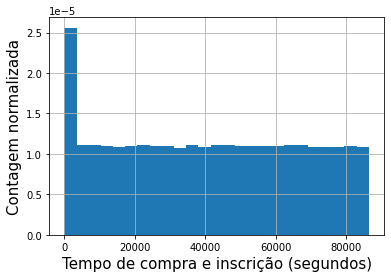

In [42]:
fraudes.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

No retorno, teremos números distribuídos uniformemente, tirando o início que provavelmente está relacionado aos casos de fraude em que o tempo é de apenas 1 segundo. Mas queremos transformá-los em valores com distribuição gaussiana ou seja, de forma normal.

In [43]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser

Text(0, 0.5, 'Contagem normalizada')

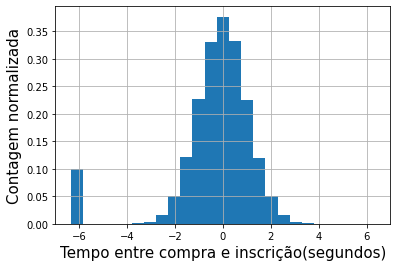

In [44]:
fraudes["tempo"] = rescale_series(fraudes.tempo)
fraudes.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

## Identificando variaveis importantes

In [45]:
#Ao aplicarmos um escalonamento em nossos dados para eles serem normalizados entre os máximos e mínimos, criamos uma equação própria
# tambem pode utilizar o MinMaxScaler(), da biblioteca scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
def rescale_series(ser):
    ser_min = ser.min()
    ser_max = ser.max()
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    return new_ser

onehotencoded = [feature for feature in fraudes.columns if "pais" not in feature and feature != "fraude"]

for col in onehotencoded:
    fraudes[col] = rescale_series(fraudes[col])

    X = fraudes[ [col for col in fraudes.columns if col != "fraude"]]
    Y = fraudes["fraude"]

In [46]:
#salvando bancos para usar outra hora
X.to_csv("X.csv", index=False)
Y.to_csv("Y.csv", index=False)

In [47]:
#importar somente o modelo ExtraTreesClassifier de sklearn.ensemble, para então criar uma instância do classificador que chamaremos de csf com o uso da 
#função ExtraTreesClassifier(). Nesta, usaremos fit() com os dois bancos X e Y para determinar quais são as colunas mais importantes

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
_ = clf.fit(X,Y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importancia'] = clf.feature_importances_

features [features.importancia > np.mean(features.importancia)].sort_values(by="importancia", ascending=False)

,feature,importancia
1,tempo,0.682790
0,media_id,0.311905


 parece que realmente o tempo e a media_id são as variáveis mais significativas. País de origem não é relevante

# Modelos Preditivos

Quando começarmos a elaborar nossos modelos, precisaremos determinar qual é melhor e qual é pior, mas não somente em termos comparativos, pois também é preciso saber se estão performando bem ou não. Para isso, usaremos as chamadas Métricas de Performance.

### Métricas de Performance - Matriz de Confusão

sempre terá quatro elementos no caso de modelos binários cuja saída é 1 ou 0. As colunas serão representadas pela classe esperada com o valor real e as linhas serão organizadas pela classe prevista

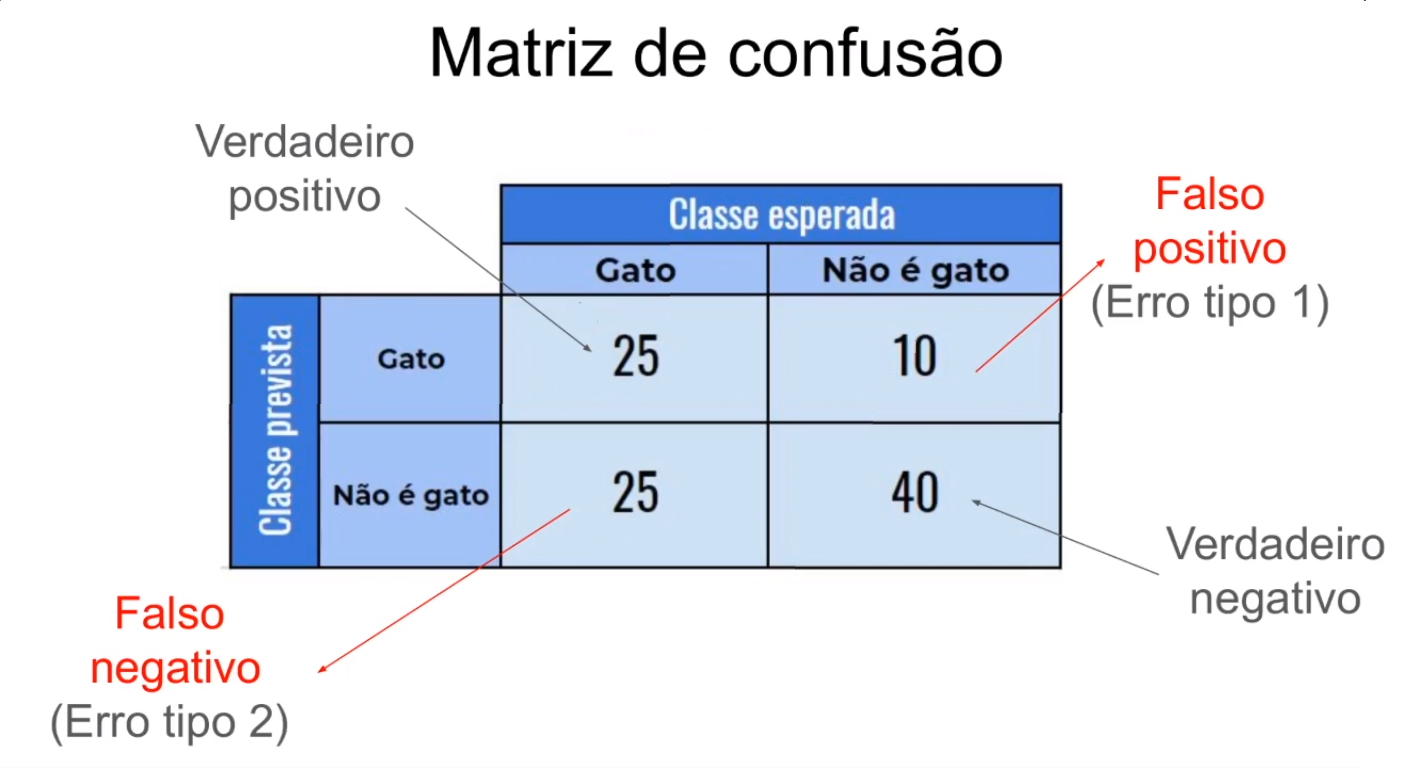

Precisão do Modelo = "Dentre todas as classificações positivas que o nosso modelo fez, quantas estão corretas?"


```
Precisão = verdadeiro positivo / verdadeiro positivo + falso positivo
```

Sensibilidade ou Revocação = "Dentre todas as classificações positivas como valor esperado, quantas estão corretas?"



```
Revocação ou Sensibilidade = verdadeiro positivo / verdadeiro positivo + falso negativo
```

Acurácia = "Dentre todas as classificações, quantas o modelo acertou realmente?"




```
Acurácia = verdadeiro positivo + verdadeiro negativo / verdadeiro positivo + falso positivo + verdadeiro negativo + falso negativo
```

**Medida F1** é uma **média harmônica** entre a Revocação ou Sensibilidade e a Precisão, ou seja, pegaremos o produto da multiplicação das duas métricas e dividiremos pela somatória das mesmas, para então multiplicar por 2 para obtermos esse tipo de média.



```
Medida F1 = 2[(Precisão) * (Sensibilidade) / (Precisão) + (Sensibilidade)]
```



A **Acurácia** é uma boa indicação geral de como o modelo performou. Então, se apresentar um baixo valor, já teremos que lidar com este problema e nem valerá a pena calcular as demais métricas de performance.


---

A **Precisão** é interessante quando os falsos positivos forem mais prejudiciais do que os falsos negativos.
Ex: seu eu pegar **casos de fraude que não eram fraudes reais** basta fazer mais perguntas ao nosso cliente


---
A **Revocação** ou **Sensibilidade** pode ser usada quando os falsos negativos são mais prejudiciais do que os falsos positivos.
Ex: eu dizer que **casos de fraude não eram fraudes** vai gerar transtornos pra companhia

---

A **Medida F1** é uma forma mais simples de observar as duas métricas da operação de forma única, sem precisarmos analisar tantas.



---

a **curva ROC** representa a taxa de falsos positivos no eixo x e a de verdadeiros positivos no eixo y. Sempre teremos os pontos 0 e 1 e os 1 e 0 representados pela linha diagonal, que basicamente seria a "sorte", ou seja, se chutássemos todas as previsões. As curvas sempre devem ser côncavas, ou seja, acima da linha diagonal, e quanto mais distante desta melhor. O caso perfeito seria constituído de uma linha sobreposta ao eixo y que atinge até o valor 1,00, e qualquer bom modelo deve estar entre as duas últimas curvas citadas, de preferência o mais próximo possível do caso perfeito.


---
o **AUC** significa Area Under the Curve, ou seja, a Área Sob a Curva é uma forma numérica de quantificar essa curva. Então será a área sob a linha de casos perfeitos e o mais distante possível da linha de "sorte" para termos um bom modelo


## Algoritmo supervisionado para detecção de anomalia

In [48]:
from sklearn.preprocessing import RobustScaler
# essa biblioteca remove a mediana e dimensiona os dados de acordo com as faixas dos quartis (quase uma forma de normalização)
from sklearn.model_selection import train_test_split
#biblioteca para separar os dados de treinamento dos dados de validação (teste)
from sklearn.ensemble import IsolationForest
#primeiro modelo que iremos utilizar
from sklearn.model_selection import GridSearchCV
# metdologia para rodar varias vezes e encontrar as melhores variaveis
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# classification report dá informação das métricas, roc_auc_score devolve o tamanho da area embaixo da curva roc, roc é a propria curva roc
from sklearn.metrics import f1_score

In [49]:
# 1. dividir os dados em em teste e treinamento pra iniciar o treinamento da classe floresta de isolamento
X_dev, X_eval, Y_dev, Y_eval = train_test_split(X, Y, train_size = 0.75, random_state = 23)
# X e Y são os dados, train size é o tamanho da amostra pra treino, random state pode ser qualquer numero pra definir a semente (SEED) inicial
Y_dev = Y_dev.apply(lambda x: 1 if x == 0 else -1)
# floresta de isolamento devolve os valores 1 quando tem um caso normal e -1 pra anomalias. Entao tem que transformar os valores destino pra 0 e 1
Y_eval = Y_eval.apply(lambda x: 1 if x == 0 else -1)

In [50]:
# cria floresta de isolamento
IF = IsolationForest(max_samples="auto", contamination = 0.095, random_state=1)
# max samples é numero de amostras maximo. setamos para automatico
# contamination é o % de amostras anomalas na camada de desenvolvimento
# random state é qualquer numero
param_grid = {"n_estimators": [100, 150, 200, 250, 300, 350, 400, 450, 500]}
# roda com varios parametros pra determinar o que é melhor
# n_estimators são os numeros de arvores dessa floresta. Nesse caso colocamos 9 estimadores

# clf é o objeto da pesquisa
# cv é a quantidade de cross validations
# n_josbs é o numero de vezes que vai rodar em paralelo
# scoring vai utilizar f1
# verbose é o nivel de detalhamento das mensagens que serão exibidas durante a execução
clf = GridSearchCV(IF,
                param_grid,
                cv=5,
                n_jobs=10,
                scoring="f1",
                verbose=10)

# _= é inserido pra rodar
# X_dev e Y_dev são os dados de treinamento
_ = clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed: 13.7min
[Parallel(n_jobs=10)]: Done  31 out of  45 | elapsed: 23.9min remaining: 10.8min
[Parallel(n_jobs=10)]: Done  36 out of  45 | elapsed: 30.4min remaining:  7.6min
[Parallel(n_jobs=10)]: Done  41 out of  45 | elapsed: 33.7min remaining:  3.3min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed: 34.0min finished


              precision    recall  f1-score   support

     anomalo       0.47      0.48      0.48      3546
      normal       0.95      0.95      0.95     34232

    accuracy                           0.90     37778
   macro avg       0.71      0.71      0.71     37778
weighted avg       0.90      0.90      0.90     37778

Area sob a curva ROC: {:0, 3f} 0.7108712561128623


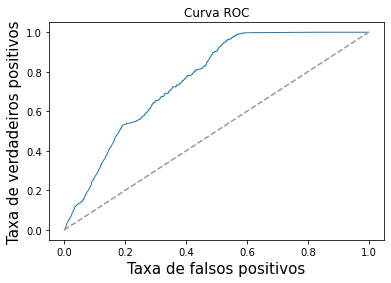

In [51]:
# IF_best são os melhores parametros obtidos no isolation forest usando a função best_estimator vinculada ao objeto clf
IF_best = clf.best_estimator_
# variavel Y_predicted é pra prever o comportamento usando esses valores que foram os melhores usando X_eval de teste
Y_predicted = IF_best.predict(X_eval)
# define uma curva roc com a função roc_auc_score em função do target e deste e o target de melhor modelo definido na variavel anterior
roc_auc = roc_auc_score(Y_eval, Y_predicted)
#classification report é um função que da informações de falsos positivos, acuracia, etc em função do Y_eval e Y_predict
# target names permite nomear / etiquetar os resultados. No nosso caso 'anomalo' e 'normal'
print (classification_report(Y_eval,
                Y_predicted,
                target_names=["anomalo","normal"]))
# :0, 3f significa um formato de float com 3 casas decimais
print("Area sob a curva ROC: {:0, 3f}", format(roc_auc))
#computar a curva e a área sobre ela. decision function é a função de decisao
IF_probs = IF_best.decision_function(X_eval)
# fpr são falsos positivos, tpr são verdadeiros positivos, threshold é o limite
fpr, tpr, threshold = roc_curve(Y_eval, IF_probs)
# plotar . lw é a largura da linha
plt.plot(fpr, tpr, lw=1)
#linha de resultado se fosse na sorte. Nosso resultado deve ser melhor do que isso
plt.plot([0,1],[0,1], '--', color=(0.6,0.6,0.6), label="sorte")
# ajusta os limites de x e y
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("Taxa de falsos positivos", fontsize=15)
plt.ylabel("Taxa de verdadeiros positivos", fontsize=15)
plt.title("Curva ROC", fontsize=12)

plt.show()

a precisão nos responde a seguinte pergunta: "daqueles que eu classifiquei como corretos. Quantos deles eram efetivenete corretos?". No caso anomalo os resultados não foram muito bons. Ficaram proximos da sorte

recall ou revocação é a frquencia com a qual meu classificador vai encontrar os exemplos de uma classe. Responde a seguinte pergunta: "Quando realmente é da classe x (da classe anomala ou da classe normal) e o quão frequente a gente classifica como x (como classe anomala ou classe normal)

precisa ter um bom equilibrio entre precisao e recall. Não adianta uma estar muito alta e outra estar baixa

macro_avg é informação de acuracia

esse curva ROC não é a melhor que poderia ser obtida. ela tem que subir mais rapido aumentando o numero de verdadeiros positivos

In [52]:
from sklearn.metrics import confusion_matrix
# importada a matriz de confusão do sklearn
cnf_matrix_IF = confusion_matrix(Y_eval, Y_predicted)
#a função recebe o y de teste e o y do melhor modelo
print(cnf_matrix_IF)

[[ 1689  1857]
 [ 1868 32364]]


em cima temos a informação de valores previstos e embaixo a informação verdadeira

## Algoritmo Não supervisionado para detecção de anomalia

In [53]:
import random
#adicionando um vetor de destinado de volta ao nosso conjunto de recursos
X["fraude"] = Y
# separando anomalias dos normais
X_anomalias = X[X['fraude'] == 1]
X_normal = X[X['fraude'] == 0]
#maostras aleatorias de 70%
train_idxs = random.sample(list(X_normal.index), int(0.7*X_normal.shape[0]))
X_train = X_normal.loc[train_idxs]
#guarda o resto para ocnjunto de teste
X_testing = X_normal.drop(train_idxs)
# conujunto de teste = instancias normais restantes + instancias da anomalia
X_testing = pd.concat([X_testing, X_anomalias], axis=0)
# embaralhar linhas para ambos os conjuntos dados e testes
X_train = X_train.sample(frac=1).reset_index(drop=True)
X_testing = X_testing.sample(frac=1).reset_index(drop=True)

Y_testing = X_testing['fraude']
#list comprehension pra copiar todos menos a fraude
X_testing = X_testing [ [col for col in X_testing.columns if col != 'fraude']]
# fazendo a separação com train test split
X_cv, X_eval, Y_cv, Y_eval = train_test_split(X_testing, Y_testing, train_size = 0.7, random_state=23)
# mapeando valores de y para convenção de -1 como normal e 1 como anomalia
Y_cv = Y_cv.apply(lambda x: 1 if x==0 else -1)
Y_eval = Y_eval.apply(lambda x: 1 if x==0 else -1)

X_train = X_train[ [col for col in X_testing.columns if col != 'fraude']]

In [54]:
# encaixando hiperparametros de validação cruzada
# 1) escolher conjunto aleatoriod e hiperparametros
# 2) encaixar o modelo svm de uma classe nesses dados de treinamento
# 3) usar pontuacao f1 pra otimizar a precisao e o recall comparando as previsoes com valores verdadeiros que agente tem

#definindo a grade de parametros para maior pesquisa
#np linspace cria um espaço linear
param_grid = {"nu": np.linspace(0.001, 0.01, 5), "gamma": [0.01, 0.03, 0.1, 0.3]}
#cria lista de parametros
param_list = list(itertools.product(param_grid["nu"],param_grid["gamma"]))

In [55]:
#função que faz o grid search efetivamente
from sklearn.svm import OneClassSVM

def random_gridsearch(param_list, n_sample, X_train, X_cv, Y_cv):

    f1_max = 0
    param_list = random.sample(param_list, n_sample)
    # o que falta de samples
    remaining_fits = n_sample
    for params in param_list:
        nu, gamma = params
        OCSVM = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        print('Fitando modelo...')
        OCSVM.fit(X_train)

        cv_preds = OCSVM.predict(X_cv)
        f1 = f1_score(Y_cv.values, cv_preds, average="binary")

        if f1 > f1_max:
            f1_max = f1
            OCSVM_best = OCSVM

            remaining_fits -=1

    return f1_max, OCSVM

f1_max, OCSVM_best = random_gridsearch(param_list, 10, X_train, X_cv, Y_cv)

Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...
Fitando modelo...


              precision    recall  f1-score   support

    anormais       0.97      0.48      0.64      4320
     normais       0.84      0.99      0.91     12252

    accuracy                           0.86     16572
   macro avg       0.90      0.74      0.78     16572
weighted avg       0.88      0.86      0.84     16572

Área sob a curva ROC: {:0.3f} 0.7354468204737549


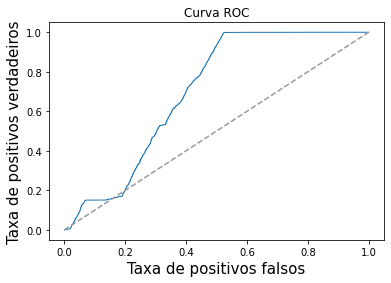

In [57]:
# fazer o relatorio de classificação completa curva roc
OCSVM_best.fit(X_train)
#variavel nova
Y_predicted = OCSVM_best.predict(X_eval)
# usa funcao score
roc_auc = roc_auc_score(Y_eval, Y_predicted)

print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))

print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

#computar a curva em si
OCSVM_probs = OCSVM_best.decision_function(X_eval)
fpr, tpr, threshold = roc_curve(Y_eval, OCSVM_probs)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

com ografico verificamos que o modelo é bom pra prever

# Melhorar modelos

vamos tentar usar a arvore de decisao , uma versao mais simplesque a arvore de isolamento

              precision    recall  f1-score   support

    anormais       0.96      0.89      0.92      4320
     normais       0.96      0.99      0.97     12252

    accuracy                           0.96     16572
   macro avg       0.96      0.94      0.95     16572
weighted avg       0.96      0.96      0.96     16572

Área sob a curva ROC: {:0.3f} 0.9387933262596583


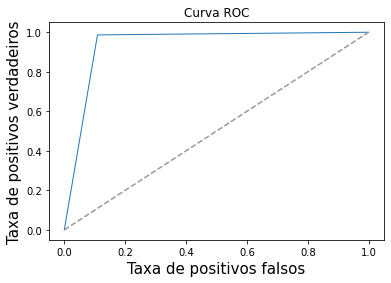

In [60]:
#importa o classificador
from sklearn.tree import DecisionTreeClassifier
# semente inicial = 1
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_dev, Y_dev)

Y_predicted = decision_tree.predict(X_eval)
roc_auc = roc_auc_score(Y_eval, Y_predicted)
#determinar as validações cruzadas
cv_preds = decision_tree.predict(X_cv)
#relatorio de classificação
print(classification_report(Y_eval,
                            Y_predicted,
                            target_names=['anormais', 'normais']))
#area sobre a curva
print('Área sob a curva ROC: {:0.3f}', format(roc_auc))

dt_probs = decision_tree.predict_proba(X_eval)
fpr, tpr, threshold= roc_curve(Y_eval, Y_predicted)

plt.plot(fpr, tpr, lw=1, label='ROC')
plt.plot([0,1], [0,1], '--', color=[0.6, 0.6, 0.6], label='sorte')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('Taxa de positivos falsos', fontsize=15)
plt.ylabel('Taxa de positivos verdadeiros', fontsize=15)
plt.title('Curva ROC')

plt.show()

1) a area sobre a curva é bem maior. 
2) casos normais e anormais são muito semelhantes. significa que o modelo não esta enviesado
esse modelo é melhor

In [61]:
print(confusion_matrix(Y_eval, Y_predicted))

[[ 3849   471]
 [  164 12088]]


a matriz de confusao mostra que apenas uns 400 caso que eram fraudes nao foram identificados. os erros de tipo 1 e tipo 2 foram diminuidos

Recomendações:
1) implementar modelo de arvore de decisao em produção
2) tempo entre cadastr e compra e quantidade de ips com unico id de usuario sao indicios de fraude
3) duarante as semanas do ano as primeiras do ano apresentaram muitas ocorrencias de fraude
4) os modelos supervisionados e nao supervisionados apresentaram muitos falsos negativos
5) supervisionado com melhoramento apresentou uma diminuição muito grande dos falsos negativos

6) Certifique-se de exigir o nome completo e endereço de email de um usuario para se inscrever
7) depois que um usuario se inscrever, apresente imediatamente ofertas / descontos em potencial
8) tambem recomendo enfaticamente aumentar a segurança durante as tres primeiras semanas do ano
9) se identificado como fraude, pedir para responder perguntas de segurança ou CAPTCHAS

obs: poderia ter usado gridsearch mas os erros de tipo 2 não seriam pegos